In [1]:
import sys
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_yaml

In [2]:
folder = '../img/test/test'
fn_list = os.listdir(folder)
class_names = ['battery','camera_battery', 'cardboard','clothes','contaminated_plastic','glass', 'human', 'keyboard','metal','mouse','pak','pants','paper', 'pen','phone', 'plastic','wrapper']

In [3]:
def plotImg(img, label):
    plt.figure(figsize=(10, 8))
    for i in range(20):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[i])
        plt.xlabel(class_names[int(label[i])])
    plt.show()

In [4]:
imgs = []
labels = []

 # load YAML and create model
yaml_file = open('model_100.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)

# load weights into new model
loaded_model.load_weights("model_100.h5")

# compile model
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# process image
IMG_HEIGHT = 150
IMG_WIDTH = 150
    
for fn in fn_list:
    path = os.path.join(folder, fn)

    # load YAML and create model
    yaml_file = open('model_100.yaml', 'r')
    loaded_model_yaml = yaml_file.read()
    yaml_file.close()
    loaded_model = model_from_yaml(loaded_model_yaml)

    # load weights into new model
    loaded_model.load_weights("model_100.h5")

    # compile model
    loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # process image
    IMG_HEIGHT = 150
    IMG_WIDTH = 150

    img = image.load_img(path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)/255

    # predict
    prediction = loaded_model.predict_classes(x)[0]
    
    imgs.append(img)
    labels.append(prediction)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


C:\Users\ABC\Anaconda3\lib\site-packages\tensorflow_core\python\keras\saving\model_config.py:76: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(yaml_string)


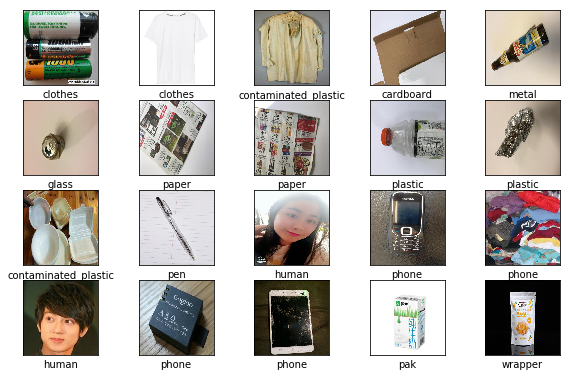

In [5]:
plotImg(imgs, labels)